In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp eda

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from PredictiveMaintenance2 import Datasets,Visualize,FeatureEng,Model

In [ ]:
file = r'C:\Users\Lalitha\Desktop\GyanData\predictive-maintenance\PredictiveMaintenance2\nbs\predictive_maintenance_dataset.csv'
machine_data = Datasets.load_dataset(file,'r')
machine_data.head(2)

File exists
.csv file extension is supported


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,01-01-2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,01-01-2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0


In [ ]:
Datasets.explore_dataset(dataset_df = machine_data,
                         NAN_action='drop',
                         duplicate_action = 'drop',
                         duplicate_subset=['device', 'date'])

In Dataset 
Observations : 124494 
Columns :12

-----NAN values-----
date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

-----Duplicate records-----
1

drop Duplicates successful 



In [ ]:
#feature function  - explain every feature
FeatureEng.explain_features(dataset_df = machine_data,
                            machine_Unique_Identifer = 'device',
                            observation_date = 'date',
                            failure = 'failure',
                            sensor_values = ['metric1','metric2'])

There are 1169 unique machines

Observations are recorded for 304 days

 First 5 unique dates are 
Index(['01-01-2015', '01-02-2015', '01-03-2015', '01-04-2015', '01-05-2015'], dtype='object', name='date')

Number of records where, 
Failure = FALSE are 124387 
Failure = TRUE are 106

Percentage of failures : 0.085%

--Warning---: 
Number of record of event type failure are too low 
Dataset is unbalanced.
Use expand_target_window function


In [ ]:
# remove invalid records of machines that are dropped out during experiment
machine_data = FeatureEng.remove_invalid_records(dataset_df=machine_data,machine_Unique_Identifer='device',observation_date='date',failure='failure')
machine_data.head(2)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
1,2015-01-02,S1F023H2,0,161679800,0,0,1,19,495730,16,16,3


In [ ]:
machine_data.shape

(19805, 12)

In [ ]:
# encoding categorical variables to numerical
machine_data = FeatureEng.to_numerical(dataset_df = machine_data)
machine_data.head(2)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,0,0,141503600,0,0,1,19,494462,16,16,3
1,2015-01-02,0,0,161679800,0,0,1,19,495730,16,16,3


In [ ]:
"""if RUL or survival time or age of equipment is not given calculate it from date and failure columns"""
machine_data_rul = FeatureEng.calculate_rul(dataset_df = machine_data,observation_date='date',machine_Unique_Identifer='device')
machine_data_rul.head(2)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL
0,2015-01-01,0,0,141503600,0,0,1,19,494462,16,16,3,18
1,2015-01-01,99,0,139929672,0,0,0,13,42,0,0,5,119


In [ ]:
# add survival time
"""if RUL or survival time or age of equipment is not given calculate it from date and failure columns"""
machine_data_rul = FeatureEng.calculate_survival_time(dataset_df=machine_data_rul,observation_date='date',machine_Unique_Identifer='device')
machine_data_rul.head(2)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL,SurvivalTime
0,2015-01-01,0,0,141503600,0,0,1,19,494462,16,16,3,18,1
1,2015-01-01,61,0,196878448,0,0,17,64,185793,0,0,2,27,1


In [ ]:
# sort the file by dates and then by devices 
machine_data_rul = machine_data_rul.sort_values(['date','device'],ascending = [True,True]).reset_index(drop=True)
machine_data_rul.head(2)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL,SurvivalTime
0,2015-01-01,0,0,141503600,0,0,1,19,494462,16,16,3,18,1
1,2015-01-01,1,0,55587136,0,0,0,7,199132,0,0,0,214,1


In [ ]:
# save the data to a .csv file
machine_data_rul.to_csv(r'C:\Users\Lalitha\Desktop\GyanData\predictive-maintenance\PredictiveMaintenance2\nbs\Machine_Data_Preprocessed.csv',index = False)

In [ ]:
metric_names = ['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8','metric9',]
x =  machine_data_rul[metric_names]
y = machine_data_rul['failure']
imp = mutual_info_classif(x,y)
feat_imp = pd.Series(imp,metric_names)

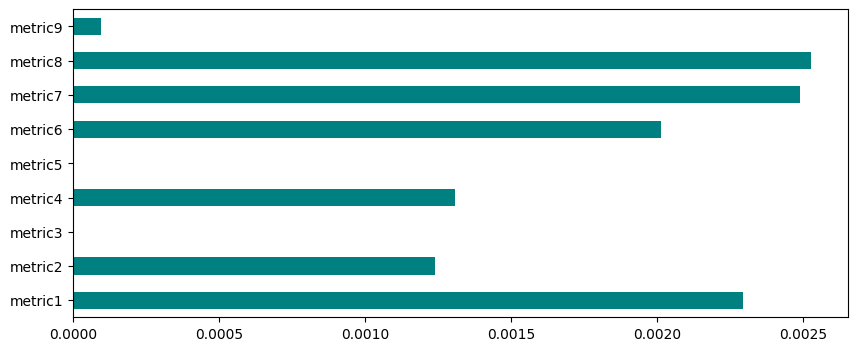

In [ ]:
plt.figure(figsize = (10,4))
feat_imp.plot(kind='barh', color = 'teal')
plt.show()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()